In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

diamonds=pd.read_csv('diamonds.csv')

# Putting target variable 'price' to the end of the dataset

temp=diamonds.price
diamonds.drop(['price'],axis=1,inplace=True)
diamonds['price']=temp

diamonds.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
diamonds.head()

#Dropping diamonds that don't have any dimensions

diamonds.drop(diamonds[diamonds['x']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['z']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['y']==0].index,inplace=True)

In [21]:
# OneHotEncoded columns

df=pd.get_dummies(diamonds,columns=['cut','color','clarity'])
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.75,5.76,3.50,2757,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,5.69,5.75,3.61,2757,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,5.66,5.68,3.56,2757,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,6.15,6.12,3.74,2757,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
# Putting target variable 'price' to the end of the dataset

temp=df.price
df.drop(['price'],axis=1,inplace=True)
df['price']=temp
df.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,326
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,1,0,0,0,0,0,326
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,1,0,0,0,327
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,0,0,0,0,0,0,1,0,0,334
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,1,0,0,0,1,0,0,0,0,335


In [23]:
# Binning done by equal data points range

df['price']=pd.qcut(diamonds.price,q=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12373,0.40,62.8,55.0,4.70,4.73,2.96,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12372,0.40,62.0,57.0,4.70,4.72,2.92,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12371,0.40,62.5,53.0,4.71,4.76,2.96,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
12370,0.26,60.7,56.0,4.13,4.17,2.52,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23753,1.27,61.3,60.0,6.90,6.99,4.26,0,0,0,1,...,0,0,0,0,0,0,0,0,1,9
23752,1.60,62.1,60.0,7.51,7.44,4.64,0,0,0,1,...,0,0,0,0,0,0,1,0,0,9
23751,1.77,63.1,57.0,7.68,7.63,4.83,0,0,0,0,...,0,0,0,1,0,0,0,0,0,9
23759,1.71,61.9,57.0,7.69,7.65,4.75,0,0,1,0,...,0,0,0,0,1,0,0,0,0,9


In [26]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=190,test_size=0.2,shuffle=True)

def show_confusion_matrix(model):
    print('Accuracy: %.2f%%' % (accuracy_score(test_Y, predi) * 100))
    print('Precision: %.2f%%' % (precision_score(test_Y, predi, average='macro') * 100))
    print('Recall: %.2f%%' % (recall_score(test_Y, predi, average='macro') * 100))
    print('F1_Score: %.2f%%' % (f1_score(test_Y, predi, average='macro') * 100))
    confusion_matrix_model = confusion_matrix(test_Y, predi)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')

In [27]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_Y)
predi=knn.predict(test_X)
accuracy_score(predi,test_Y)

AttributeError: 'NoneType' object has no attribute 'split'

Accuracy: 30.12%
Precision: 17.70%
Recall: 29.96%
F1_Score: 14.66%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


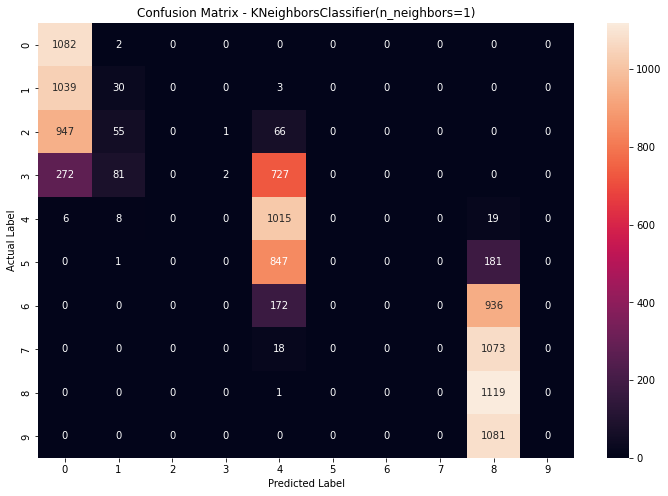

In [28]:
show_confusion_matrix(knn)

In [29]:
gnb=GaussianNB()
gnb.fit(train_X,train_Y)
predi=gnb.predict(test_X)
accuracy_score(predi,test_Y)

0.5344955489614244

Accuracy: 53.45%
Precision: 53.79%
Recall: 53.46%
F1_Score: 51.83%


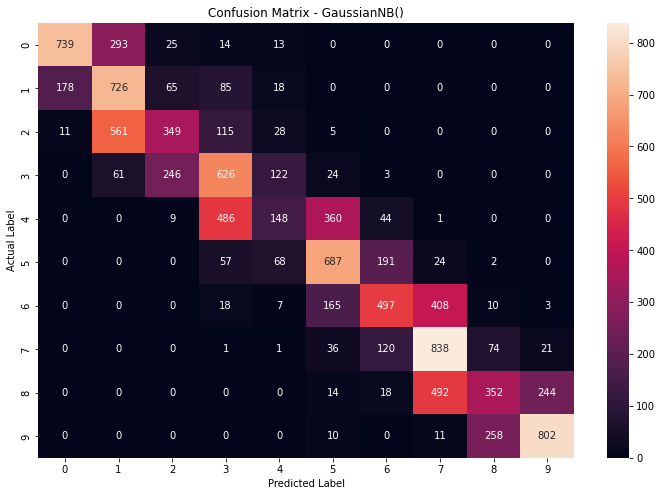

In [30]:
show_confusion_matrix(gnb)

In [31]:
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
predi=dt.predict(test_X)
accuracy_score(predi,test_Y)

0.7738316023738873

Accuracy: 77.38%
Precision: 77.42%
Recall: 77.39%
F1_Score: 77.39%


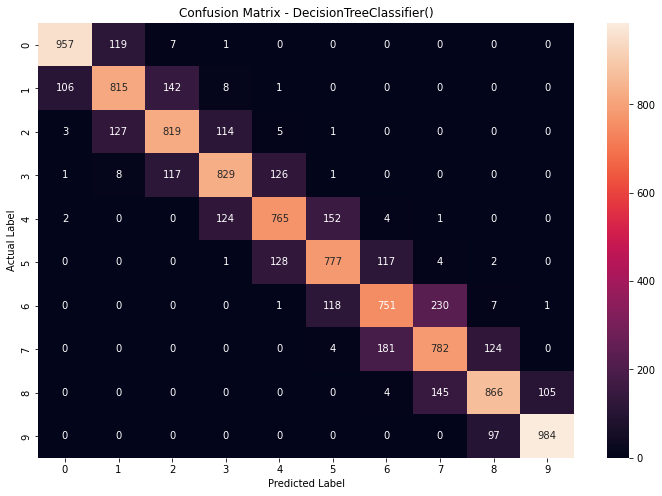

In [32]:
show_confusion_matrix(dt)

In [33]:
xgboost=XGBClassifier()
xgboost.fit(train_X,train_Y)
predi=xgboost.predict(test_X)
accuracy_score(predi,test_Y)

0.8352188427299704

Accuracy: 83.52%
Precision: 83.54%
Recall: 83.55%
F1_Score: 83.52%


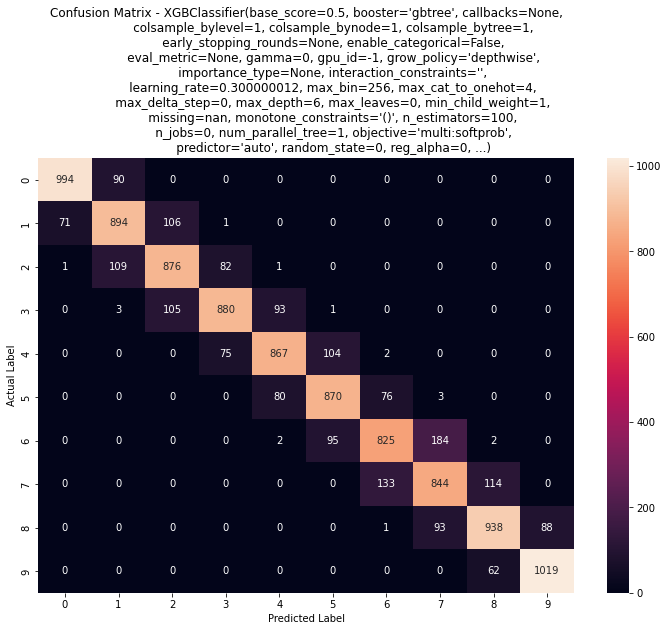

In [34]:
show_confusion_matrix(xgboost)

In [35]:
randomforest=RandomForestClassifier()
randomforest.fit(train_X,train_Y)
predi=randomforest.predict(test_X)
accuracy_score(predi,test_Y)

0.8201038575667656

Accuracy: 82.01%
Precision: 81.99%
Recall: 82.02%
F1_Score: 81.99%


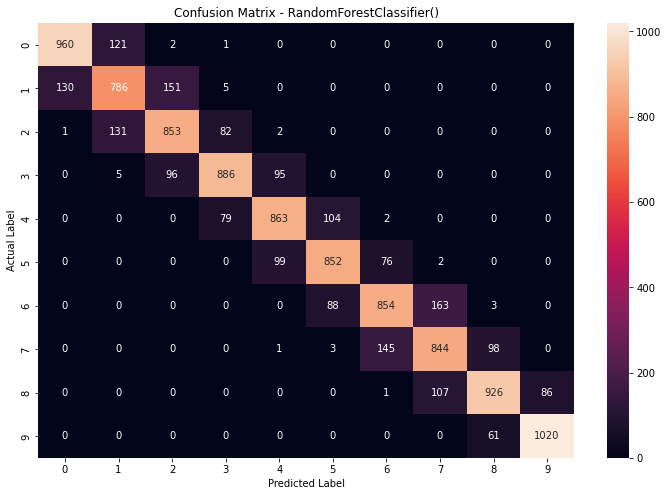

In [36]:
show_confusion_matrix(randomforest)

In [37]:
gradientboosting=GradientBoostingClassifier()
gradientboosting.fit(train_X,train_Y)
predi=gradientboosting.predict(test_X)
accuracy_score(predi,test_Y)

0.7568620178041543

Accuracy: 75.69%
Precision: 75.74%
Recall: 75.69%
F1_Score: 75.64%


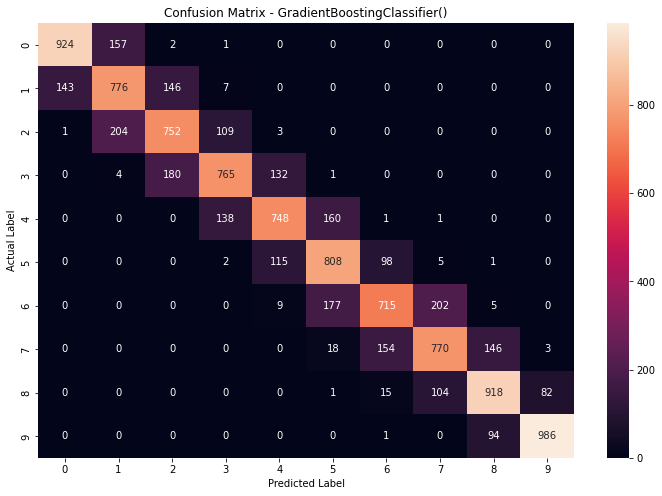

In [38]:
show_confusion_matrix(gradientboosting)

In [39]:
adaboost=AdaBoostClassifier()
adaboost.fit(train_X,train_Y)
predi=adaboost.predict(test_X)
accuracy_score(predi,test_Y)

0.30118694362017806

Accuracy: 30.12%
Precision: 17.70%
Recall: 29.96%
F1_Score: 14.66%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


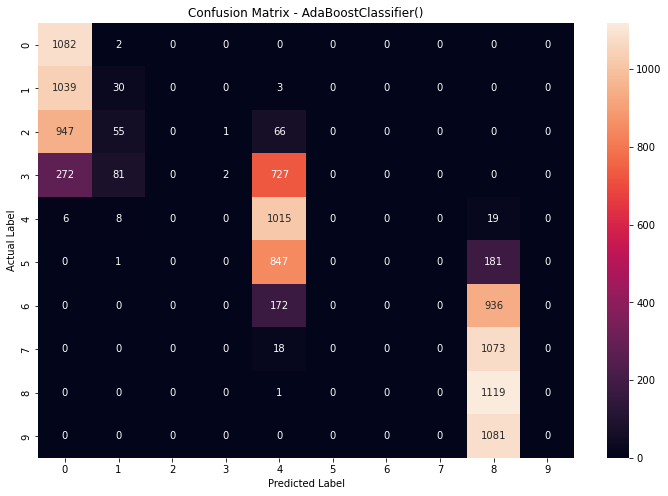

In [40]:
show_confusion_matrix(adaboost)